# Decomposição de série temporal


In [23]:
# Importação das bibliotecas
import pandas as pd
import matplotlib.pylab as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime
from os import path
# registro de converters para uso do matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


In [24]:
# Carregamento da base de dados, conversão do atributo para data e criação da série temporal (ts)
base = pd.read_csv(path.join("..", "data", "AirPassengers.csv"))
def dateparse(dates):
    return datetime.strptime(dates, '%Y-%m')


base = pd.read_csv(path.join("..", "data", "AirPassengers.csv"), parse_dates=['Month'],
                   index_col='Month', date_parser=dateparse)
ts = base['#Passengers']


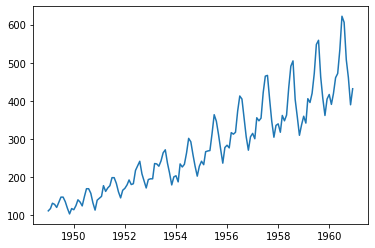

In [25]:
# Visualização da série temporal
plt.plot(ts)


In [26]:
# Decomposição da série temporal, criando uma variável para cada formato
decomposicao = seasonal_decompose(ts)


In [27]:
# tendencia
tendencia = decomposicao.trend
tendencia


Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64

In [28]:
# sozonalidade
sazonal = decomposicao.seasonal
sazonal


Month
1949-01-01   -24.748737
1949-02-01   -36.188131
1949-03-01    -2.241162
1949-04-01    -8.036616
1949-05-01    -4.506313
                ...    
1960-08-01    62.823232
1960-09-01    16.520202
1960-10-01   -20.642677
1960-11-01   -53.593434
1960-12-01   -28.619949
Name: seasonal, Length: 144, dtype: float64

In [29]:
# erro
aleatorio = decomposicao.resid
aleatorio


Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: resid, Length: 144, dtype: float64

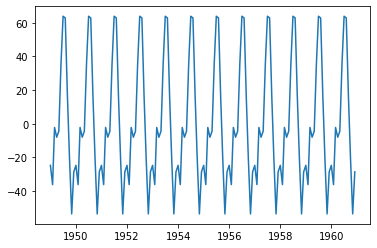

In [30]:
# Visualização de gráfico para cada formato da série temporal
plt.plot(sazonal)


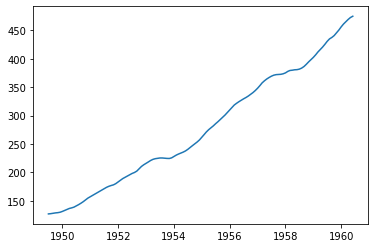

In [31]:
plt.plot(tendencia)


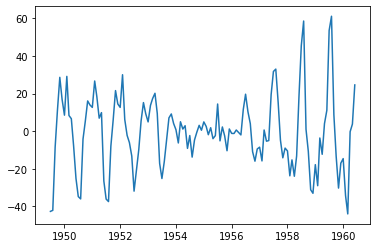

In [32]:
plt.plot(aleatorio)


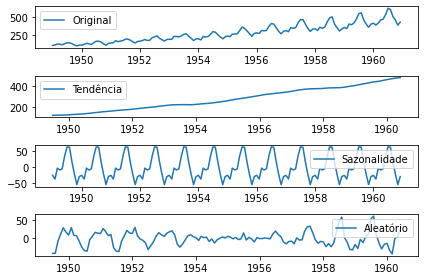

In [33]:
plt.subplot(4, 1, 1)
plt.plot(ts, label='Original')
plt.legend(loc='best')

# Visualização somente da tendência
plt.subplot(4, 1, 2)
plt.plot(tendencia, label='Tendência')
plt.legend(loc='best')

# Visualização somente da sazonalidade
plt.subplot(4, 1, 3)
plt.plot(sazonal, label='Sazonalidade')
plt.legend(loc='best')

# Visualização somente do elemento aleatório
plt.subplot(4, 1, 4)
plt.plot(aleatorio, label='Aleatório')
plt.legend(loc='best')
plt.tight_layout()
